# The Numpy.Random Package 

***

![Python & Jupyter](Images/python-jupyter-notebooks.jpg)

![Numpy](Images/Numpy.png)



######  <i> Pictures adapted from references 1,2  </i>

## Conor McCaffrey
#### Programming for Data Analysis 2021
[Official Documentation for the Numpy Random Package](https://numpy.org/doc/stable/reference/random/index.html)  [3] <br>
[Click here for copy of Assignment](Images/ProgDA_Assignment.pdf)


***

## Assignment Objectives
- Explain the overall purpose of the package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

## What is the purpose of the Numpy.Random Package?

###### Overview of Numpy.
Prior to delving too deeply into the mechanics of a package, it is prudent to first understand the inherent purpose of a package. 
<br>
- <u> Numpy</u> (an abbreviation of "<b>Num</b>erical <b>Py</b>thon"  [4] ) is essentially " the fundamental package for scientific computing in Python " [5]. This open-source package provides many resources that are of particular importance to scientific computing. According to official documentation [5], Numpy is a "Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more". 
- The core of the Numpy package is the "array", which is similar to a list with the main exception being that we can perform mathematical operations/arithmetic functions on arrays that are not possible on lists [6]. Lists can contain data of differing data-types while arrays are used to house elements of the same data type [7]. Upon creation, an array has a fixed size (technically immutable) in where changing elements of an array will delete the original and return a copy of the original array with whatever operation you requested, in contrast to lists, which are mutable [8,5].

![Arrays](Images/arrays.png)
###### Adapted from reference [31]


###### So how does this tie in to the Numpy.Random Package?

Now that we have a basic overview of the Numpy package as a whole, let's examine the mechanics of the Numpy.Random package. At the highest level, the Numpy.Random package allows the production of arrays of "pseudo-random" numbers for downstream analyses [3]. This is acheived using what are known as a "BitGenerator" and a "Generator" [3]. BitGenerators create sequences of 32/64 random bits (based on different algorithms) which are then leveraged by Generators (taking a bit generator as an argument) to create sequences of numbers, adhering to a certain probability distribution (i.e Uniform, Normal or Binomial) [3,9]. The Generator (replacing the legacy RandomState) from the latest update of Numpy.Random uses bits provided by PCG-64 (Permuted Congruential Generator, a family of algorithms) as opposed to the legacy MT19937 (Marsenne Twister) due to enhanced statistical performence [3,10,11]. This will be covered in greater detail in the section discussing "Seeding". "Seeding" is an important concept, allowing the work to be reproducible to others attempting to examine/re-create your work.

###### In Summary...
The Numpy.Random package contains functions that faciliate the generation of arrays of pseudo-random numbers with specific probability distributions [12,13]. 

***
## Simple Random Data and Permutations

In this passage I want to give an overview of "Simple Random Data" and "Permutations", as outlined in the official documentation [3]. 
<br>

The Simple Random Data section outlines a set of functions that can be utilised in order to, logically, generate simple random data based on user inputs, which can of course be modified. Data types that can be returned include integers, floats, random samples from a given array and bytes [3]. The functions available for use, following the latest update, are:
- integers(low[, high, size, dtype, endpoint]) - Return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive).
- random([size, dtype, out]) - Return random floats in the half-open interval [0.0, 1.0).
- choice(a[, size, replace, p, axis, shuffle]) - Generates a random sample from a given array
- bytes(length) - Return random bytes.

Permutations (coming from the word <i> permute</i> (meaning to "alter/rearrange" [14]), meanwhile, create random re-arrangements of the order of elements [3]. Three functions are called out in the official documentation [3]:
- shuffle(x[, axis]) - Modify an array or sequence in-place by shuffling its contents.
- permutation(x[, axis] - Randomly permute a sequence, or return a permuted range.
- permuted(x[, axis, out]) -Randomly permute x along axis axis.

We will cover each of these in more detail below.

In [1]:
# To begin, let's import the packages we will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This  line-orientated magic command, as outlined in lectures, lets us display plots inline
%matplotlib inline

###### Numpy.Random: numpy.random.Generator.integers




This is the variable "a": 
 [2 5 4 3 7 5 4 0 0 7 7 6 7 0 4] 
 The type of the variable is: <class 'numpy.ndarray'>


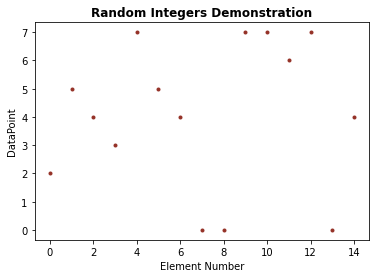

In [2]:
# Generate an array of integers
rng = np.random.default_rng() # Call default_rng to get a new instance of a Generator, from official documentation [3]
a =  rng.integers(8, size=15) # Up to but not including 8. Size is the shape of the array
print('This is the variable "a": \n' , a, '\n The type of the variable is:', type(a)) 

# Plot our variable to demonstrate random data, adapted from reference 15
plt.plot(a, 'b.', color = '#943126') # setting colour of datapoints [16]
plt.title('Random Integers Demonstration', fontweight='heavy',  size=12) # Setting title and weight of title [18]
plt.xlabel('Element Number', size=10) # Setting axis title and font size
plt.ylabel('DataPoint', size=10)
plt.grid(False) # Used hex value for colour [19]

In [3]:
# Further manipulation of the integer function.
# Generate a multi-dimensional array.

# Size is structured as the following: 2x4 array
b =  rng.integers(10, size=(2, 4))
print('This is b: \n' , b)

# Output is a 1D array
c = rng.integers(low = 0, high = 7, size = 10) 
print ('This is c: \n', c)

# Specifying multiple parameters
d =  rng.integers(5, size=(5,2),  endpoint=True) # Boolean True to determine if '5' included in arrays
print('This is d: \n', d)

# Wrapping empty function in try except block to investigate effect [17]
try:
    rng.integers()
except BaseException as err:
    print('This has caused an error')
else:
    print('Function still worked')


This is b: 
 [[0 6 8 0]
 [9 2 5 2]]
This is c: 
 [2 1 5 6 2 4 5 3 5 2]
This is d: 
 [[0 5]
 [0 2]
 [0 1]
 [5 4]
 [3 5]]
This has caused an error


Text(0.5, 1.0, 'Random integers from the discrete uniform distribution')

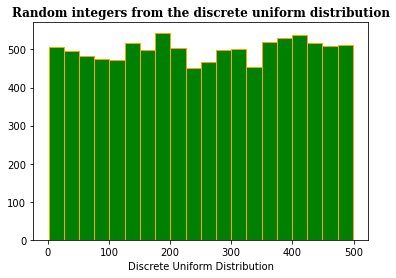

In [4]:
# Plotting using the numpy.random.Generator.integers function
x1 = rng.integers(low = 1, high=500, size = 10000) # generating random values between 1-499
plt.hist(x1, bins = 20, color = 'green', edgecolor = 'orange') # Some decorations
plt.xlabel('Discrete Uniform Distribution')
plt.title('Random integers from the discrete uniform distribution', fontweight = 'heavy', family = 'serif')


We have shown here that the distribution of the values is uniform, as detailed in the official documentation. [20]

###### Numpy.Random: numpy.random.Generator.random


This function is quite similar to the one above and is desribed in the official documentation as the following: [21]

![Random.random](Images/Random.random.PNG)


array([0.92841092, 0.02048527, 0.58663283, 0.36912341, 0.11554472,
       0.91213315, 0.02804551, 0.22333283, 0.3485684 , 0.62311959,
       0.08555607, 0.91086577, 0.8857338 , 0.58570375, 0.8147608 ,
       0.1797029 , 0.25625852, 0.35197774, 0.9598779 , 0.80670575])

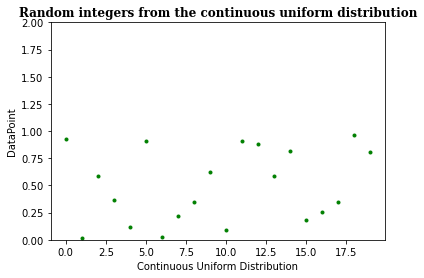

In [5]:
# Plotting using the numpy.random.Generator.random function
# This function returns floats
x2 = rng.random(size = 20) # 10 random floats
plt.plot(x2, 'b.', color = 'green') # Some decorations
plt.ylim(0,2.0) # setting x-axis limits
plt.ylabel('DataPoint')
plt.xlabel('Continuous Uniform Distribution')
plt.title('Random integers from the continuous uniform distribution', fontweight = 'heavy', family = 'serif')
x2

Something intersting to note here is how the generated random numbers are all between 0.0 and 1.0. I examined this by purposefully setting the upper x-limit to 2.0 just to determine if a result above 1.0 appeared. This is evidence that that statement from the official documentaion (half-open interval) is true [21].

There is an interesting difference in the above functions I want to highlight. It is obvious how Numpy.integers returns integer values and how Numpy.random can return float values. Something I feel is more important to highlight between the functions is the difference between discrete and continuous distribution as a result of these mechanics. Random.integers returns values of discrete uniform distribution (where there are a finite number of outcomes), while Random.random returns values of continuous uniform distribution(where there are an infinite number of outcomes) [22]. 

- Thinking of this logically, if you flip a coin, you can have only two possible outcomes: Heads or Tails (i.e 1 or 0). While the outcome is random (you hope!), you can only have two possible outcomes (i.e a finite amount of outcomes). This is the basis of discrete distribution. [23] 
- Compare this to continuous distribution, where we could have an infinite number of equally likely outcomes. An example of this could be an truely random number generator, in where any value could appear just as likely as any other value an infinite number of times.

![Coin](Images/Coin.jpg)

###### <i> Adapted from Reference 24 </i>


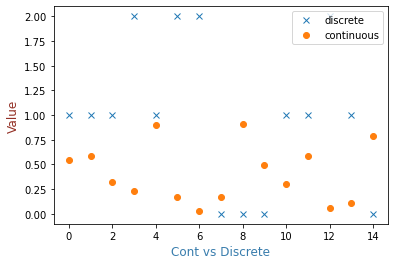

In [6]:
# Compare the two functions used in a scatterplot 
# Demonstate the difference between continuous and discrete uniform distribution.
x3 = rng.integers(low = 0, high=3, size = 15) 
x4 = rng.random(size = 15) 

plt.plot(x3, 'x', label='discrete')
plt.plot(x4, 'o', label='continuous')
plt.xlabel('Cont vs Discrete', size=12, color = '#397dad')
plt.ylabel('Value', size=12, color = '#943126')
plt.grid(False) # dont want gridlines for this
plt.legend()

We can clearly see from the above scatterplot the simple difference between discrete and continuous uniform distribution. For the Numpy.Random.Integers (discrete distribution) we only have the values 0,1 or 2 compared to Numpy.Random.random (continuous distribution) where we have random values between 0.0 and 1.0. 

###### Numpy.Random: numpy.random.Generator.choice


This function allows the user to generate a random sample from a non-empty array (if the variable is an array) or in the range of the specified integer [25]. 

In [7]:
# Initial investigations into choice method
rng = np.random.default_rng() 
a =  rng.choice(5) # generate a random integer
# Select 2 random arrays from list with replace set to False to avoid selecting same 
b = rng.choice(([11, 4, 8], [7, 4, 9], [1, 2, 9], [12,44,89]), 2 ,replace = False)
print('This is the variable a:' , a, '\n This is b:' ,b)

This is the variable a: 2 
 This is b: [[ 1  2  9]
 [12 44 89]]


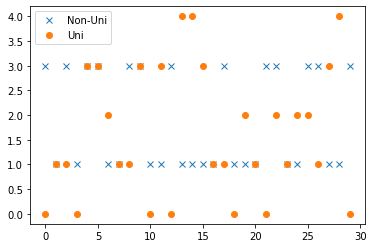

In [8]:
# Investigation into p parameter in choice method for distribution
# We will see a non-uniform distribution in a1 due to setting probabilities
a1 = rng.choice(5, 30, p=[0.0, 0.5, 0.0, 0.5, 0])  # adapted from reference 25
b1 = rng.choice(5, 30)

plt.plot(a1, 'x', label='Non-Uni')
plt.plot(b1, 'o', label='Uni')
plt.legend()

Lets explore this probability distribution parameter a little closer

In [32]:
# Generate a list of counties in Ulster who can win the Ulster Title for the next 40 years
counties = ['Cavan','Fermanagh','Monaghan','Tyrone','Donegal','Down','Antrim','Armagh','Derry']
ulsterTitle = rng.choice(counties, 40, p=[0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0], replace=True)  

# Return in numerical format how many times each county wins the title
unique_elements, counts_elements = np.unique(ulsterTitle, return_counts=True) 
print('How many times each county won the Ulster Title:') # adapted from reference 26
print(np.asarray((unique_elements, counts_elements))) # return as an array [27]

How many times each county won the Ulster Title:
[['Antrim' 'Armagh' 'Cavan' 'Donegal' 'Down' 'Fermanagh' 'Monaghan'
  'Tyrone']
 ['4' '3' '14' '2' '2' '5' '7' '3']]


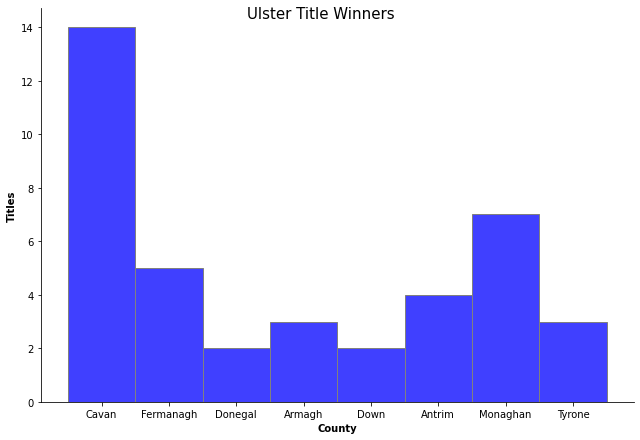

In [33]:
# Lets display on a Seaborn Histogram this glorious liklihood
# Took a long time to get aspect solution [28]
sns.displot(ulsterTitle, color = 'blue', edgecolor = 'grey', height=6, aspect=9/6)
plt.figsize = (170,100)
plt.xlabel('County', fontweight = 'bold')
plt.ylabel('Titles', fontweight = 'bold')
plt.suptitle('Ulster Title Winners', fontsize = 15) # adding main title to histogram and setting fontsize
plt.grid(False) 


In summary, the choice function selects a random sample or samples from an array, however we can manipulate the selection by setting probabilites.

###### Numpy.Random: numpy.random.Generator.bytes


This function simply returns random bytes [29]:
![Bytes](Images/Bytes.png)



In [11]:
# Returning Random bytes
np.random.bytes(12)

b'$\x899\x7f\xf9>^1\x86\xdb`\xc0'

###### Numpy.Random: numpy.random.Generator.shuffle


The shuffle method within Permutations facilitates the re-ordering of contents within a sequence [30]. 

![Shuffle](Images/shuffle.png)




In [12]:
# Shuffle method
input = np.arange(15)
rng.shuffle(input) # using shuffle method
print('1D array:', input) # printing array of shuffled results

# We can also manipulate the shape of the output 
new_input = np.arange(8).reshape((4, 2)) # resulting in a 4x2 array, adapted from [30]
rng.shuffle(new_input) 
print('We have now changed the shape of the output: \n', new_input)

# Let's look how specifying axis can alter the output 
arr = np.arange(8).reshape((4, 2))
rng.shuffle(arr, axis=1)
print('Setting the axis to 1: \n', arr) # alters results by column

1D array: [ 9  4  5  3  8 12  7  6  2 11 14  0  1 10 13]
We have now changed the shape of the output: 
 [[4 5]
 [2 3]
 [6 7]
 [0 1]]
Setting the axis to 1: 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


It is also worth noting that when changing the value of the axis, the individual values within the axis do not change. Only the row/column as a whole changes. [30]

###### Numpy.Random: numpy.random.Generator.permutation

The permutation method within Permutations facilitates the re-ordering of contents within a sequence [32]. A notable difference between this method and the shuffle method is the permutation method returns a copy of the array while shuffle deals with the original array [33].

![Permutation](Images/Permutation.png)


In [13]:
# Permutation method
rng = np.random.default_rng()
result = rng.permutation(12)
print('1D array:', result ) # printing array of results in range of integer

# Similar to the shuffle function, we can also manipulate the shape of the output 
new_perm = np.arange(8).reshape((4, 2)) # resulting in a 4x2 array, adapted from [33]
rng.shuffle(new_perm) 
print('We have now changed the shape of the output: \n', new_perm)

1D array: [ 9  5  0  7 10  8  2 11  1  3  4  6]
We have now changed the shape of the output: 
 [[4 5]
 [6 7]
 [0 1]
 [2 3]]


In [14]:
# Let's explore this in-place/copy idea a little more

# If x is an array, make a copy and shuffle the elements randomly
original_List = [1,4,9,12,15]
permuted_List = np.random.permutation(original_List)
print('This is the original List before permutation:', original_List , 'and this is the permuted List:', permuted_List)
print('This is the original_List after permutation', original_List)

# Let's compare this to the shuffle function
original_shuffled_List = [1,2,3,4,5]
print('This is the List before shuffling:',original_shuffled_List)
print('This is the original_shuffled_List after shuffling', original_shuffled_List)


This is the original List before permutation: [1, 4, 9, 12, 15] and this is the permuted List: [ 4 12  1  9 15]
This is the original_List after permutation [1, 4, 9, 12, 15]
This is the List before shuffling: [1, 2, 3, 4, 5]
This is the original_shuffled_List after shuffling [1, 2, 3, 4, 5]


###### Numpy.Random: numpy.random.Generator.permuted
The permutation method within Permutations facilitates the permutation of 'x' along the axis <i>axis</i> [34]. A notable difference between this method and the shuffle method is eacxh slice in the permutated method is shuffled independently of the others.[34]


![Permuted](Images/Permuted.png)

Let's explore this.

In [15]:
# Generating a test instance [34]
rng = np.random.default_rng()
# Creating an array
array_1 = np.arange(1,21).reshape(5, 4)
print('This is the original array: \n' , array_1)
array_2 = rng.permuted(array_1, axis=1)
print('This is the permuted array: \n' , array_2) # the rows have been shuffled with the original unchanged
array_3 = rng.permuted(array_1, axis=0)
print('This is the permuted array setting axis=0:\n' , array_3) #columns shuffled with the original unchanged
print('Back to original:\n', array_1)
# We can set 'out=array_1' to change the original (in-place change as opposed to copy change)
rng.permuted(array_1, axis=1, out=array_1)
print('This is now array_1 after setting parameter for "out":\n',array_1)


This is the original array: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
This is the permuted array: 
 [[ 4  2  1  3]
 [ 8  6  7  5]
 [10  9 12 11]
 [15 14 16 13]
 [17 19 18 20]]
This is the permuted array setting axis=0:
 [[ 9 18 11 16]
 [13 10 19 20]
 [17 14  7 12]
 [ 5  6  3  4]
 [ 1  2 15  8]]
Back to original:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
This is now array_1 after setting parameter for "out":
 [[ 3  1  2  4]
 [ 7  5  8  6]
 [10 12 11  9]
 [13 15 16 14]
 [17 18 19 20]]


***
## Distributions
***


There are over 36 different distribution functions listed in the official documentation [3]. At it's most basic, a probability distribution 'is a table or an equation that links each outcome of a statistical experiment with its probability of occurrence' [35]. 
<br>
<br>
Let's take an extremely basic example of a footballer taking a penalty. There are two possible options here: the player either scores a goal or misses. Suppose the player takes two penalites (let's pretend the goalkeeper came off the line too early), there are four possible resulting outcomes (S= Scores, M= Misses) : SS, MM, SM, MS. The random variable X will represent the number of times the footballer scores and can be calculated. We can see visually that in 3 of the 4 possible outcomes the player scores at least once. We can display the probabilities of each outcome in the following table i.e. the <b>probability distribution</b>: 
<br>


   | Number of Goals  | Probability    |
|:-------------|:-----------|
| 0 | 0.25       | 
| 1  | 0.5    |
| 2  | 0.25    |

<i>Table Adapted from Reference 36</i>

A <b>cumulative probability</b>, meanwhile, denotes the liklihood that a random variable will fall within a certain specified range [35]. Going back to our earlier example, we can investigate the likehood of a player scoring one or less penalties. So this would be investigating the liklihood of the player scoring one penalty <u>and</u> the likehood of the player missing both penalties.

P(X ≤ 1) = P(X = 0) + P(X = 1) = 0.25 + 0.50 = 0.75
 
Now that we have a basic understanding of probabilities and distributions, let's delve a little deeper into the Distribution functions for generating random samples in Numpy.

###### random.Generator.uniform



![Uniform Distribution](Images/uniform_Distribution.png)


In [16]:
# Uniform Distribution (https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html#numpy.random.uniform)
np.random.uniform(-1,0,1000)   # three paramters. 1000 appears to be number of elements returned.
# Test to see if final parameter is indeed size
np.random.uniform(-1,0,10)  # 10 elements return so assumption is correct

np.random.uniform(10,9,10)  # find out why this function works when high limit is lower is lower limit. Random uniform gives numbers is an interval. 

array([9.38350087, 9.97534259, 9.81117847, 9.27246862, 9.99487472,
       9.68663768, 9.51357068, 9.56343043, 9.01578373, 9.43006822])

(array([ 956., 1013.,  995., 1044., 1017.,  984.,  966.,  994., 1012.,
        1019.]),
 array([9.61799846e-02, 1.00058286e+02, 2.00020391e+02, 2.99982497e+02,
        3.99944603e+02, 4.99906708e+02, 5.99868814e+02, 6.99830920e+02,
        7.99793025e+02, 8.99755131e+02, 9.99717236e+02]),
 <BarContainer object of 10 artists>)

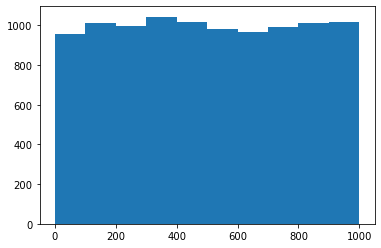

In [17]:
x = np.random.uniform(0,1000,10000)
plt.hist(x)

(array([  4.,  33.,  76., 195., 233., 221., 147.,  61.,  26.,   4.]),
 array([ 9.69446634,  9.75746477,  9.82046319,  9.88346162,  9.94646004,
        10.00945847, 10.07245689, 10.13545532, 10.19845374, 10.26145217,
        10.32445059]),
 <BarContainer object of 10 artists>)

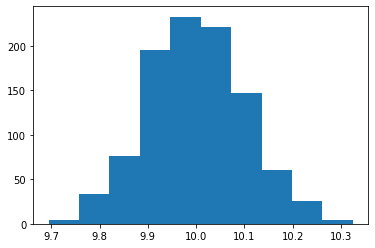

In [18]:
# Normal Distribution
 
x = np.random.normal(0, 0.1, 1000)  # close to '0' = mu (mean of distribution), 90% values between 0.3 & -0.3, 1000 values
# plt.hist(x)

# Changing mu value 
x_2 = np.random.normal(10, 0.1, 1000)  # it appears changing 'mu' changes the population mean.
plt.hist(x_2)

In [19]:
# Look at the differences between each one (understand what the functions do, programming level of experience)

In [20]:
# Seeding (to do with the time on computer when code is run. Decided once and from then on numbers generated are based on that seed.)
# Seed is the position at where you start




In [21]:
# How does PCG 64 outperfom Mersenne Twister algorithm . Melissa O Neill. Test through documentation. Formulate how to seed the algorithm so you get reproducible results from algotrithm.